In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
data = pd.read_csv("/Users/patel/Downloads/archive (2)/house_prices.csv")
data.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [3]:
data.shape

(187531, 21)

In [4]:
data.isnull().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [5]:
data_1 = data.drop(['Plot Area','Dimensions','Index'],axis=1)
data_1.head(15)

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN
5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,45 Lac,6618.0,thane,NaN,Ready to Move,2 out of 7,Resale,Unfurnished,East,"Garden/Park, Main Road",Virat Aangan,1,1,NaN,Co-operative Society,680 sqft
6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,16.5 Lac,2538.0,thane,550 sqft,Ready to Move,4 out of 5,Resale,Unfurnished,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
7,1 BHK Ready to Occupy Flat for sale Kalwa,Creatively planned and constructed is a 1 BHK ...,60 Lac,10435.0,thane,NaN,Ready to Move,Ground out of 7,Resale,Furnished,NaN,NaN,NaN,1,NaN,NaN,NaN,575 sqft
8,1 BHK Ready to Occupy Flat for sale Kalwa,Discover this immaculate 1 BHK flat for sale a...,60 Lac,10000.0,thane,NaN,Ready to Move,Ground out of 2,Resale,Furnished,NaN,NaN,NaN,1,NaN,NaN,Co-operative Society,600 sqft
9,3 BHK Ready to Occupy Flat for sale in Pride P...,One can find this stunning 3 BHK flat for sale...,1.60 Cr,11150.0,thane,900 sqft,Ready to Move,3 out of 27,Resale,Unfurnished,East,Garden/Park,Pride Palms,3,1,1 Covered,Freehold,NaN


In [6]:
data_1.isnull().sum()

Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
dtype: int64

In [7]:
location = data_1['location'].value_counts()
location

new-delhi      27599
bangalore      24030
kolkata        22380
gurgaon        20070
ahmedabad      12750
               ...  
nellore           30
solapur           30
madurai           30
palakkad          30
pondicherry       30
Name: location, Length: 81, dtype: int64

In [8]:
frequency_map = data_1['location'].value_counts(normalize=True).to_dict()
frequency_map

{'new-delhi': 0.14717033450469522,
 'bangalore': 0.12813881438268873,
 'kolkata': 0.11934026907551284,
 'gurgaon': 0.10702230564546662,
 'ahmedabad': 0.06798875919181362,
 'hyderabad': 0.0655891559262202,
 'chennai': 0.05599074286384651,
 'jaipur': 0.045272514944195895,
 'greater-noida': 0.025115847513211147,
 'faridabad': 0.020476614533063868,
 'vadodara': 0.012733894662749093,
 'surat': 0.012637910532125355,
 'pune': 0.011864705035434141,
 'thane': 0.010307629138649077,
 'mumbai': 0.00991836016445281,
 'visakhapatnam': 0.009598413062373688,
 'mohali': 0.009118492409255004,
 'zirakpur': 0.008158651103017634,
 'chandigarh': 0.00767873044989895,
 'noida': 0.006830870629389274,
 'goa': 0.006398942041582458,
 'ranchi': 0.005759047837424212,
 'bhiwadi': 0.005599074286384651,
 'kochi': 0.005599074286384651,
 'dehradun': 0.005279127184305528,
 'ghaziabad': 0.004964512533927724,
 'lucknow': 0.004777876724381569,
 'patna': 0.004159312327028598,
 'kanpur': 0.004159312327028598,
 'guwahati': 0.0

In [9]:
data_1['location_freq_encoded'] = data_1['location'].map(frequency_map)
data_1

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,0.008159
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,0.008159
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,0.008159
187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,0.008159


In [10]:
data_2 = data_1.copy()
data_2 = data_2.drop('location',axis=1)

In [11]:
data_2['Amount(in rupees)'].value_counts()

Call for Price    9684
85 Lac            5264
65 Lac            4229
60 Lac            3869
70 Lac            3801
                  ... 
21.60 Cr             1
21.45 Cr             1
9.45 Cr              1
13.6 Lac             1
9.90 Cr              1
Name: Amount(in rupees), Length: 1561, dtype: int64

In [12]:
def convert_to_float(x):
    new_values = x.split(' ')
    if (new_values[1]=='Lac' or new_values[1]=='lac') :
        return (float(new_values[0]))
    if (new_values[1]=='Cr' or new_values[1]=='Cr'):
        return (float(new_values[0]))*100
    else :
        return None

In [13]:
convert_to_float('1.60 Cr')

160.0

In [14]:
data_3 = data_2.copy()
data_3['Amount(in rupees)'] = data_3['Amount(in rupees)'].apply(convert_to_float)
data_3

,Title,Description,Amount(in rupees),Price (in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42.0,6000.0,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98.0,13799.0,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,140.0,17500.0,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25.0,NaN,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",160.0,18824.0,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63.0,3225.0,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,0.008159
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55.0,3274.0,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,0.008159
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76.0,4343.0,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,0.008159
187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30.0,4231.0,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,0.008159


In [15]:
data_clean = data_3.copy()
data_clean = data_clean.dropna(subset = ['Amount(in rupees)'])

In [16]:
data_4 = data_clean.reset_index(drop=True)

In [17]:
data_5 = data_4.drop(['Title','Description','facing'],axis=1)
data_5

,Amount(in rupees),Price (in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,6000.0,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,13799.0,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,17500.0,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,NaN,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,18824.0,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177842,63.0,3225.0,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,0.008159
177843,55.0,3274.0,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,0.008159
177844,76.0,4343.0,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,0.008159
177845,30.0,4231.0,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,0.008159


In [18]:
data_6 = data_5.copy()
data_6 = data_6.dropna(subset = ['Status'])
data_6

,Amount(in rupees),Price (in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,6000.0,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,13799.0,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,17500.0,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,NaN,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,18824.0,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177842,63.0,3225.0,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,0.008159
177843,55.0,3274.0,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,0.008159
177844,76.0,4343.0,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,0.008159
177845,30.0,4231.0,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,0.008159


In [19]:
data_6 = data_6.reset_index(drop=True)
data_6

,Amount(in rupees),Price (in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,6000.0,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,13799.0,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,17500.0,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,NaN,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,18824.0,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177247,63.0,3225.0,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,0.008159
177248,55.0,3274.0,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,0.008159
177249,76.0,4343.0,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,0.008159
177250,30.0,4231.0,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,0.008159


In [20]:
data_7 = data_6.drop(['Price (in rupees)'],axis=1)
data_7

,Amount(in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177247,63.0,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,0.008159
177248,55.0,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,0.008159
177249,76.0,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,0.008159
177250,30.0,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,0.008159


In [21]:
data_8 = data_7.copy()
data_8 = data_8.dropna(subset = ['Carpet Area'])
data_8

,Amount(in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177243,80.0,1200 sqft,Ready to Move,3 out of 3,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159
177244,119.0,1705 sqft,Ready to Move,5 out of 10,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159
177245,69.6,895 sqft,Ready to Move,5 out of 8,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159
177246,44.9,1050 sqft,Ready to Move,1 out of 3,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159


In [22]:
data_8 = data_8.reset_index(drop=True)
data_8

,Amount(in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101441,80.0,1200 sqft,Ready to Move,3 out of 3,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159
101442,119.0,1705 sqft,Ready to Move,5 out of 10,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159
101443,69.6,895 sqft,Ready to Move,5 out of 8,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159
101444,44.9,1050 sqft,Ready to Move,1 out of 3,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159


In [23]:
def convert_to_float(x) :
    values = x.split(' ')
    if (len(values)>=2 and values[1]=='sqyrd'):
        return float(values[0])*9
    if (len(values)>=2 and values[1]=='sqft'):
        return float(values[0])
    if (len(values)>=2 and values[1]=='sqm'):
        return float(values[0])*10.76
    try:
        return float(x)
       
    except:
        return None
    

In [24]:
convert_to_float('267 sqm')

2872.92

In [25]:
data_9 = data_8.copy()
data_9['Carpet Area'] = data_9['Carpet Area'].apply(convert_to_float)
data_9

,Amount(in rupees),Carpet Area,Status,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101441,80.0,1200.0,Ready to Move,3 out of 3,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159
101442,119.0,1705.0,Ready to Move,5 out of 10,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159
101443,69.6,895.0,Ready to Move,5 out of 8,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159
101444,44.9,1050.0,Ready to Move,1 out of 3,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159


In [26]:
data_9 = data_9.drop('Status',axis=1)

In [27]:
data_9

,Amount(in rupees),Carpet Area,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500.0,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473.0,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779.0,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530.0,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635.0,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101441,80.0,1200.0,3 out of 3,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159
101442,119.0,1705.0,5 out of 10,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159
101443,69.6,895.0,5 out of 8,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159
101444,44.9,1050.0,1 out of 3,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159


In [28]:
data_9 = data_9.dropna(subset = ['Floor'])
data_9

,Amount(in rupees),Carpet Area,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500.0,10 out of 11,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473.0,3 out of 22,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779.0,10 out of 29,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530.0,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635.0,20 out of 42,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101441,80.0,1200.0,3 out of 3,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159
101442,119.0,1705.0,5 out of 10,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159
101443,69.6,895.0,5 out of 8,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159
101444,44.9,1050.0,1 out of 3,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159


In [29]:
def convert_to_float_1(x):
    values = x.split(' ')
    if (values[0]=='Ground' or values[0]=='ground'):
        return 0
    if len(values)==4:
        return (float(values[0]) / float(values[3]))
    
    try :
        return float(x)
    except:
        return None

In [30]:
data_10 = data_9.copy()
data_10['Floor'] = data_10['Floor'].apply(convert_to_float_1)
data_10

,Amount(in rupees),Carpet Area,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500.0,0.909091,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473.0,0.136364,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779.0,0.344828,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530.0,0.333333,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635.0,0.476190,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101441,80.0,1200.0,1.000000,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159
101442,119.0,1705.0,0.500000,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159
101443,69.6,895.0,0.625000,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159
101444,44.9,1050.0,0.333333,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159


In [31]:
data_10 = data_10.reset_index(drop=True)
data_10

,Amount(in rupees),Carpet Area,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500.0,0.909091,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473.0,0.136364,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779.0,0.344828,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530.0,0.333333,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635.0,0.476190,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99258,80.0,1200.0,1.000000,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159
99259,119.0,1705.0,0.500000,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159
99260,69.6,895.0,0.625000,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159
99261,44.9,1050.0,0.333333,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159


In [32]:
data_10 = data_10.dropna(subset = ['Transaction'])
data_10 = data_10.reset_index(drop=True)
data_10

,Amount(in rupees),Carpet Area,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded
0,42.0,500.0,0.909091,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308
1,98.0,473.0,0.136364,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308
2,140.0,779.0,0.344828,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308
3,25.0,530.0,0.333333,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308
4,160.0,635.0,0.476190,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99202,80.0,1200.0,1.000000,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159
99203,119.0,1705.0,0.500000,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159
99204,69.6,895.0,0.625000,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159
99205,44.9,1050.0,0.333333,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159


In [33]:
data_10['Transaction'].unique().sum()

'ResaleNew PropertyOther'

In [34]:
Transaction_dummies = pd.get_dummies(data_10['Transaction'],drop_first=True)
Transaction_dummies

,Other,Resale
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
99202,0,1
99203,0,1
99204,0,1
99205,0,0


In [35]:
data_10 = pd.concat([data_10,Transaction_dummies],axis=1)
data_10

,Amount(in rupees),Carpet Area,Floor,Transaction,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded,Other,Resale
0,42.0,500.0,0.909091,Resale,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308,0,1
1,98.0,473.0,0.136364,Resale,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308,0,1
2,140.0,779.0,0.344828,Resale,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308,0,1
3,25.0,530.0,0.333333,Resale,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308,0,1
4,160.0,635.0,0.476190,Resale,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99202,80.0,1200.0,1.000000,Resale,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159,0,1
99203,119.0,1705.0,0.500000,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159,0,1
99204,69.6,895.0,0.625000,Resale,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159,0,1
99205,44.9,1050.0,0.333333,New Property,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159,0,0


In [36]:
data_10 = data_10.drop('Transaction',axis=1)
data_10

,Amount(in rupees),Carpet Area,Floor,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,location_freq_encoded,Other,Resale
0,42.0,500.0,0.909091,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,0.010308,0,1
1,98.0,473.0,0.136364,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,0.010308,0,1
2,140.0,779.0,0.344828,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,0.010308,0,1
3,25.0,530.0,0.333333,Unfurnished,NaN,NaN,1,1,NaN,NaN,NaN,0.010308,0,1
4,160.0,635.0,0.476190,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,0.010308,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99202,80.0,1200.0,1.000000,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,NaN,0.008159,0,1
99203,119.0,1705.0,0.500000,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,NaN,0.008159,0,1
99204,69.6,895.0,0.625000,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,NaN,0.008159,0,1
99205,44.9,1050.0,0.333333,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,NaN,0.008159,0,0


In [37]:
data_11 = data_10.copy()
data_11 = data_11.drop(['Super Area'],axis=1)

In [38]:
data_11 = data_11.dropna(subset = ['Furnishing'])
data_11

,Amount(in rupees),Carpet Area,Floor,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,location_freq_encoded,Other,Resale
0,42.0,500.0,0.909091,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,0.010308,0,1
1,98.0,473.0,0.136364,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,0.010308,0,1
2,140.0,779.0,0.344828,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,0.010308,0,1
3,25.0,530.0,0.333333,Unfurnished,NaN,NaN,1,1,NaN,NaN,0.010308,0,1
4,160.0,635.0,0.476190,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,0.010308,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99202,80.0,1200.0,1.000000,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,0.008159,0,1
99203,119.0,1705.0,0.500000,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,0.008159,0,1
99204,69.6,895.0,0.625000,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,0.008159,0,1
99205,44.9,1050.0,0.333333,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,0.008159,0,0


In [39]:
Furnishing_dummies = pd.get_dummies(data_11['Furnishing'],drop_first=True)
Furnishing_dummies

,Semi-Furnished,Unfurnished
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
99202,1,0
99203,1,0
99204,1,0
99205,0,1


In [40]:
data_11 = pd.concat([data_11,Furnishing_dummies],axis=1)
data_11

,Amount(in rupees),Carpet Area,Floor,Furnishing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,42.0,500.0,0.909091,Unfurnished,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,0.010308,0,1,0,1
1,98.0,473.0,0.136364,Semi-Furnished,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,0.010308,0,1,1,0
2,140.0,779.0,0.344828,Unfurnished,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,0.010308,0,1,0,1
3,25.0,530.0,0.333333,Unfurnished,NaN,NaN,1,1,NaN,NaN,0.010308,0,1,0,1
4,160.0,635.0,0.476190,Unfurnished,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,0.010308,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99202,80.0,1200.0,1.000000,Semi-Furnished,Garden/Park,GHB Splande,3,3,NaN,Freehold,0.008159,0,1,1,0
99203,119.0,1705.0,0.500000,Semi-Furnished,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,0.008159,0,1,1,0
99204,69.6,895.0,0.625000,Semi-Furnished,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,0.008159,0,1,1,0
99205,44.9,1050.0,0.333333,Unfurnished,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,0.008159,0,0,0,1


In [41]:
data_11 = data_11.drop('Furnishing',axis=1)
data_11

,Amount(in rupees),Carpet Area,Floor,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,42.0,500.0,0.909091,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,0.010308,0,1,0,1
1,98.0,473.0,0.136364,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,0.010308,0,1,1,0
2,140.0,779.0,0.344828,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,0.010308,0,1,0,1
3,25.0,530.0,0.333333,NaN,NaN,1,1,NaN,NaN,0.010308,0,1,0,1
4,160.0,635.0,0.476190,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,0.010308,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99202,80.0,1200.0,1.000000,Garden/Park,GHB Splande,3,3,NaN,Freehold,0.008159,0,1,1,0
99203,119.0,1705.0,0.500000,"Garden/Park, Pool, Main Road",Orvis Grand,5,3,1 Covered,Freehold,0.008159,0,1,1,0
99204,69.6,895.0,0.625000,"Garden/Park, Pool, Main Road",Sushma Joynest MOH 1,3,2,1 Covered,Freehold,0.008159,0,1,1,0
99205,44.9,1050.0,0.333333,"Garden/Park, Main Road",Peer Muchalla Apartments RWF,3,2,NaN,Freehold,0.008159,0,0,0,1


In [42]:
data_11 = data_11.reset_index(drop=True)

In [43]:
data_12 = data_11.copy()
data_12 = data_12.drop(['overlooking','Society'],axis=1)
data_12

,Amount(in rupees),Carpet Area,Floor,Bathroom,Balcony,Car Parking,Ownership,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,42.0,500.0,0.909091,1,2,NaN,NaN,0.010308,0,1,0,1
1,98.0,473.0,0.136364,2,NaN,1 Open,Freehold,0.010308,0,1,1,0
2,140.0,779.0,0.344828,2,NaN,1 Covered,Freehold,0.010308,0,1,0,1
3,25.0,530.0,0.333333,1,1,NaN,NaN,0.010308,0,1,0,1
4,160.0,635.0,0.476190,2,NaN,1 Covered,Co-operative Society,0.010308,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99178,80.0,1200.0,1.000000,3,3,NaN,Freehold,0.008159,0,1,1,0
99179,119.0,1705.0,0.500000,5,3,1 Covered,Freehold,0.008159,0,1,1,0
99180,69.6,895.0,0.625000,3,2,1 Covered,Freehold,0.008159,0,1,1,0
99181,44.9,1050.0,0.333333,3,2,NaN,Freehold,0.008159,0,0,0,1


In [44]:
data_12 = data_12.dropna(subset='Bathroom')
data_12

,Amount(in rupees),Carpet Area,Floor,Bathroom,Balcony,Car Parking,Ownership,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,42.0,500.0,0.909091,1,2,NaN,NaN,0.010308,0,1,0,1
1,98.0,473.0,0.136364,2,NaN,1 Open,Freehold,0.010308,0,1,1,0
2,140.0,779.0,0.344828,2,NaN,1 Covered,Freehold,0.010308,0,1,0,1
3,25.0,530.0,0.333333,1,1,NaN,NaN,0.010308,0,1,0,1
4,160.0,635.0,0.476190,2,NaN,1 Covered,Co-operative Society,0.010308,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99178,80.0,1200.0,1.000000,3,3,NaN,Freehold,0.008159,0,1,1,0
99179,119.0,1705.0,0.500000,5,3,1 Covered,Freehold,0.008159,0,1,1,0
99180,69.6,895.0,0.625000,3,2,1 Covered,Freehold,0.008159,0,1,1,0
99181,44.9,1050.0,0.333333,3,2,NaN,Freehold,0.008159,0,0,0,1


In [45]:
data_13 = data_12.copy()
data_13 = data_13.dropna(subset = ['Balcony'])
data_13

,Amount(in rupees),Carpet Area,Floor,Bathroom,Balcony,Car Parking,Ownership,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,42.0,500.0,0.909091,1,2,NaN,NaN,0.010308,0,1,0,1
3,25.0,530.0,0.333333,1,1,NaN,NaN,0.010308,0,1,0,1
6,160.0,900.0,0.111111,3,1,1 Covered,Freehold,0.010308,0,1,0,1
8,425.0,1820.0,0.666667,4,1,2 Covered,Freehold,0.010308,0,1,1,0
9,90.0,675.0,0.625000,2,1,1 Covered,Freehold,0.010308,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99178,80.0,1200.0,1.000000,3,3,NaN,Freehold,0.008159,0,1,1,0
99179,119.0,1705.0,0.500000,5,3,1 Covered,Freehold,0.008159,0,1,1,0
99180,69.6,895.0,0.625000,3,2,1 Covered,Freehold,0.008159,0,1,1,0
99181,44.9,1050.0,0.333333,3,2,NaN,Freehold,0.008159,0,0,0,1


In [46]:
data_13 = data_13.reset_index(drop=['True'])

In [47]:
data_13['Balcony'].unique()

array(['2', '1', '3', '4', '6', '5', '7', '10', '> 10', '8', '9'],
      dtype=object)

In [48]:
no = data_13['Balcony'].value_counts()

In [49]:
no

2       36431
1       29944
3       17952
4        8309
5         518
6          78
7          10
10          8
8           8
> 10        6
9           2
Name: Balcony, dtype: int64

In [50]:
l = no[no==6]
l

> 10    6
Name: Balcony, dtype: int64

In [51]:
data_13 = data_13.drop(data_13[data_13.Balcony == '> 10'].index)

In [52]:
data_13 = data_13.reset_index(drop=True)
data_13

,Amount(in rupees),Carpet Area,Floor,Bathroom,Balcony,Car Parking,Ownership,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,42.0,500.0,0.909091,1,2,NaN,NaN,0.010308,0,1,0,1
1,25.0,530.0,0.333333,1,1,NaN,NaN,0.010308,0,1,0,1
2,160.0,900.0,0.111111,3,1,1 Covered,Freehold,0.010308,0,1,0,1
3,425.0,1820.0,0.666667,4,1,2 Covered,Freehold,0.010308,0,1,1,0
4,90.0,675.0,0.625000,2,1,1 Covered,Freehold,0.010308,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
93255,80.0,1200.0,1.000000,3,3,NaN,Freehold,0.008159,0,1,1,0
93256,119.0,1705.0,0.500000,5,3,1 Covered,Freehold,0.008159,0,1,1,0
93257,69.6,895.0,0.625000,3,2,1 Covered,Freehold,0.008159,0,1,1,0
93258,44.9,1050.0,0.333333,3,2,NaN,Freehold,0.008159,0,0,0,1


In [53]:
data_14 = data_13.copy()
data_14 = data_14.drop(['Car Parking','Ownership'],axis=1)
data_14

,Amount(in rupees),Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,42.0,500.0,0.909091,1,2,0.010308,0,1,0,1
1,25.0,530.0,0.333333,1,1,0.010308,0,1,0,1
2,160.0,900.0,0.111111,3,1,0.010308,0,1,0,1
3,425.0,1820.0,0.666667,4,1,0.010308,0,1,1,0
4,90.0,675.0,0.625000,2,1,0.010308,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
93255,80.0,1200.0,1.000000,3,3,0.008159,0,1,1,0
93256,119.0,1705.0,0.500000,5,3,0.008159,0,1,1,0
93257,69.6,895.0,0.625000,3,2,0.008159,0,1,1,0
93258,44.9,1050.0,0.333333,3,2,0.008159,0,0,0,1


In [54]:
data_14['Amount(in rupees)'].unique()

array([ 42. ,  25. , 160. , ...,  26.6,  88.6,  76.2])

C:\Users\patel\AppData\Local\Temp\ipykernel_6904\2491503611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_14['Amount(in rupees)'])


(0.0, 1000.0)

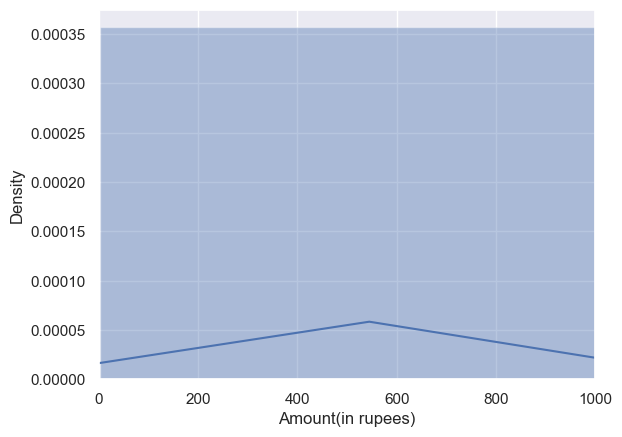

In [55]:
sns.distplot(data_14['Amount(in rupees)'])
plt.xlim(0, 1000)

In [56]:
log_price = np.log(data_14['Amount(in rupees)'])
data_14['Log_Price'] = log_price
data_14

,Amount(in rupees),Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished,Log_Price
0,42.0,500.0,0.909091,1,2,0.010308,0,1,0,1,3.737670
1,25.0,530.0,0.333333,1,1,0.010308,0,1,0,1,3.218876
2,160.0,900.0,0.111111,3,1,0.010308,0,1,0,1,5.075174
3,425.0,1820.0,0.666667,4,1,0.010308,0,1,1,0,6.052089
4,90.0,675.0,0.625000,2,1,0.010308,0,0,0,1,4.499810
...,...,...,...,...,...,...,...,...,...,...,...
93255,80.0,1200.0,1.000000,3,3,0.008159,0,1,1,0,4.382027
93256,119.0,1705.0,0.500000,5,3,0.008159,0,1,1,0,4.779123
93257,69.6,895.0,0.625000,3,2,0.008159,0,1,1,0,4.242765
93258,44.9,1050.0,0.333333,3,2,0.008159,0,0,0,1,3.804438


C:\Users\patel\AppData\Local\Temp\ipykernel_6904\810174514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_14['Log_Price'])


<Axes: xlabel='Log_Price', ylabel='Density'>

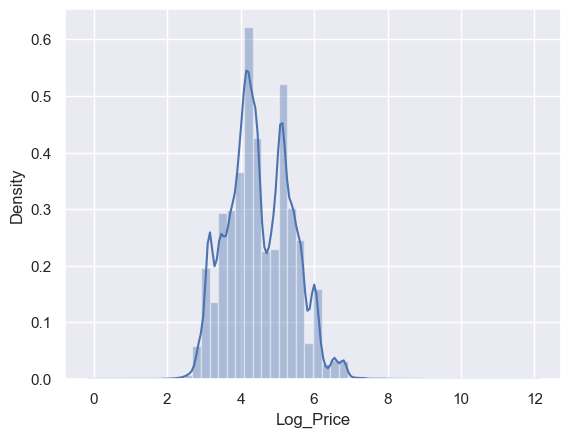

In [57]:
sns.distplot(data_14['Log_Price'])

In [58]:
data_15 = data_14.copy()
data_15 = data_15.drop('Amount(in rupees)',axis=1)

In [59]:
data_15['Balcony'] = data_15[['Balcony']].astype({'Balcony': float})

In [60]:
data_15 = data_15.drop(data_15[data_15.Bathroom == '> 10'].index)

In [61]:
data_15 = data_15.dropna(subset = ['Floor'])
data_15['Floor'].isnull().sum()

0

In [62]:
data_15 = data_15.dropna(subset = ['Carpet Area'])
data_15

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished,Log_Price
0,500.0,0.909091,1,2.0,0.010308,0,1,0,1,3.737670
1,530.0,0.333333,1,1.0,0.010308,0,1,0,1,3.218876
2,900.0,0.111111,3,1.0,0.010308,0,1,0,1,5.075174
3,1820.0,0.666667,4,1.0,0.010308,0,1,1,0,6.052089
4,675.0,0.625000,2,1.0,0.010308,0,0,0,1,4.499810
...,...,...,...,...,...,...,...,...,...,...
93255,1200.0,1.000000,3,3.0,0.008159,0,1,1,0,4.382027
93256,1705.0,0.500000,5,3.0,0.008159,0,1,1,0,4.779123
93257,895.0,0.625000,3,2.0,0.008159,0,1,1,0,4.242765
93258,1050.0,0.333333,3,2.0,0.008159,0,0,0,1,3.804438


In [63]:
target = data_15['Log_Price']
inputs = data_15.drop('Log_Price',axis=1)
inputs

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,500.0,0.909091,1,2.0,0.010308,0,1,0,1
1,530.0,0.333333,1,1.0,0.010308,0,1,0,1
2,900.0,0.111111,3,1.0,0.010308,0,1,0,1
3,1820.0,0.666667,4,1.0,0.010308,0,1,1,0
4,675.0,0.625000,2,1.0,0.010308,0,0,0,1
...,...,...,...,...,...,...,...,...,...
93255,1200.0,1.000000,3,3.0,0.008159,0,1,1,0
93256,1705.0,0.500000,5,3.0,0.008159,0,1,1,0
93257,895.0,0.625000,3,2.0,0.008159,0,1,1,0
93258,1050.0,0.333333,3,2.0,0.008159,0,0,0,1


In [64]:
inputs['Carpet Area'].unique()

array([ 500.,  530.,  900., ..., 1634., 1709.,  136.])

In [65]:
inputs_1 = sm.add_constant(inputs)
results = sm.OLS(target,inputs.astype(float)).fit()

In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Log_Price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          5.378e+05
Date:                Mon, 18 Sep 2023   Prob (F-statistic):                        0.00
Time:                        09:05:21   Log-Likelihood:                         -89283.
No. Observations:               93033   AIC:                                  1.786e+05
Df Residuals:                   93024   BIC:                                  1.787e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Carpet Area            7.089e-06   7.44e-07      9.529      0.000    5.63e-06    8.55e-06
Floor                     0.3942      0.007     53.947      0.000       0.380       0.409
Bathroom                  0.9008      0.002    396.944      0.000       0.896       0.905
Balcony                   0.1949      0.002     81.938      0.000       0.190       0.200
location_freq_encoded     6.0724      0.038    160.463      0.000       5.998       6.147
Other                     0.5695      0.447      1.275      0.202      -0.306       1.445
Resale                    0.3149      0.005     69.916      0.000       0.306       0.324
Semi-Furnished            0.8156      0.006    132.639      0.000       0.804       0.828
Unfurnished               0.9489      0.006    159.004      0.000       0.937       0.961
==============================================================================
Omnibus:                     6966.934   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24131.114
Skew:                           0.344   Prob(JB):                         0.00
Kurtosis:                       5.399   Cond. No.                     6.75e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
inputs = pd.DataFrame(inputs, dtype=float)


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = inputs[['Carpet Area',  'Floor', 
       'Bathroom', 'Balcony', 'location_freq_encoded']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [69]:
vif

,VIF,features
0,1.262451,Carpet Area
1,4.056071,Floor
2,7.689277,Bathroom
3,6.124365,Balcony
4,2.962515,location_freq_encoded


In [70]:
inputs = inputs.reset_index(drop=True)
inputs

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,500.0,0.909091,1.0,2.0,0.010308,0.0,1.0,0.0,1.0
1,530.0,0.333333,1.0,1.0,0.010308,0.0,1.0,0.0,1.0
2,900.0,0.111111,3.0,1.0,0.010308,0.0,1.0,0.0,1.0
3,1820.0,0.666667,4.0,1.0,0.010308,0.0,1.0,1.0,0.0
4,675.0,0.625000,2.0,1.0,0.010308,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
93028,1200.0,1.000000,3.0,3.0,0.008159,0.0,1.0,1.0,0.0
93029,1705.0,0.500000,5.0,3.0,0.008159,0.0,1.0,1.0,0.0
93030,895.0,0.625000,3.0,2.0,0.008159,0.0,1.0,1.0,0.0
93031,1050.0,0.333333,3.0,2.0,0.008159,0.0,0.0,0.0,1.0


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
scaler.fit(inputs)

StandardScaler()

In [73]:
input_scaled = scaler.transform(inputs)
input_scaled

array([[-0.28723101,  1.27244964, -1.74104514, ...,  0.61837133,
        -1.0242753 ,  1.28528143],
       [-0.27666309, -0.78348963, -1.74104514, ...,  0.61837133,
        -1.0242753 ,  1.28528143],
       [-0.14632539, -1.57701005,  0.48703377, ...,  0.61837133,
        -1.0242753 ,  1.28528143],
       ...,
       [-0.14808671,  0.25800592,  0.48703377, ...,  0.61837133,
         0.97630003, -0.77803972],
       [-0.09348578, -0.78348963,  0.48703377, ..., -1.61715131,
        -1.0242753 ,  1.28528143],
       [-0.02303297, -0.78348963,  0.48703377, ...,  0.61837133,
        -1.0242753 , -0.77803972]])

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_scaled,target,test_size=0.3,random_state=365)

In [75]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [76]:
y_hat = reg.predict(x_train)
y_hat

array([4.47589004, 5.06931271, 4.2910703 , ..., 5.07212954, 3.87246261,
       4.08478529])

In [77]:
learning_rate = 0.02

In [78]:
x_train.shape

(65123, 9)

C:\Users\patel\AppData\Local\Temp\ipykernel_6904\673607322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


<Axes: xlabel='Log_Price', ylabel='Density'>

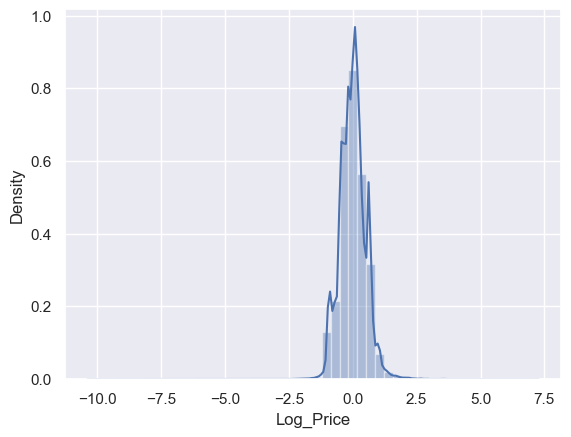

In [79]:
sns.distplot(y_train - y_hat)

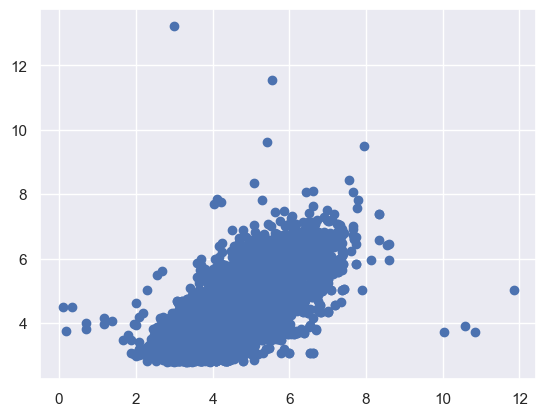

In [80]:
plt.scatter(y_train,y_hat)

In [81]:
reg.score(x_train,y_train)

0.6708344143551144

In [82]:
reg.score(x_test,y_test)

0.6616136289225466

In [83]:
weights = reg.coef_
weights.shape

(9,)

In [84]:
biases = reg.intercept_
biases.shape

()

In [85]:
y_hat_test = reg.predict(x_test)

C:\Users\patel\AppData\Local\Temp\ipykernel_6904\1659955656.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_hat_test)


<Axes: xlabel='Log_Price', ylabel='Density'>

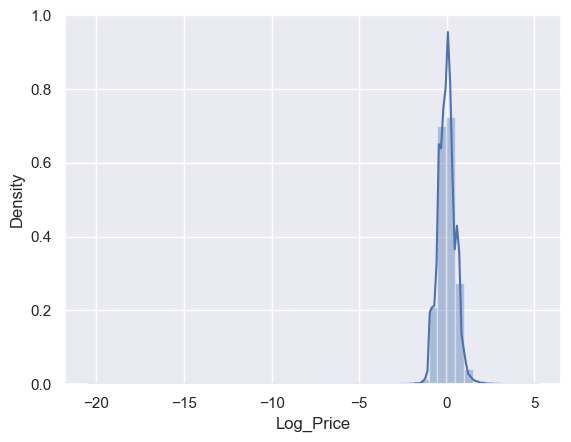

In [86]:
sns.distplot(y_test-y_hat_test)

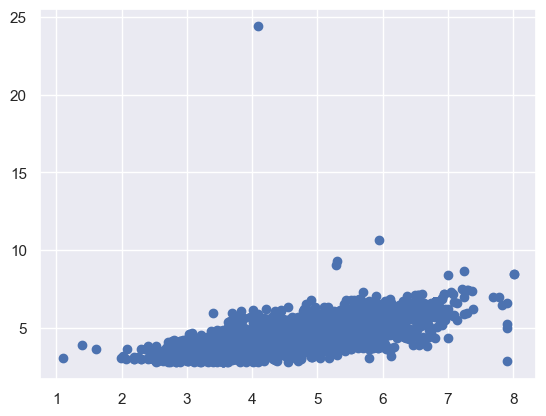

In [87]:
plt.scatter(y_test,y_hat_test)

In [88]:
from sklearn.metrics import max_error
max_error(y_test,y_hat_test)

20.310623901803663

In [89]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Train the model
model.fit(x_train, y_train)

# Evaluate the model
score = model.score(x_test, y_test)
print("R-squared (R2):", score)

R-squared (R2): 0.936299245231574


In [90]:
y_pred_1 = model.predict(x_train)
y_pred_1

array([4.19502147, 5.16478597, 4.27666612, ..., 5.85793315, 4.31748811,
       4.98360662])

In [91]:
errors = abs(y_pred_1 - y_train)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.04 degrees.


In [92]:
mape = 100 * (errors / y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.06 %.


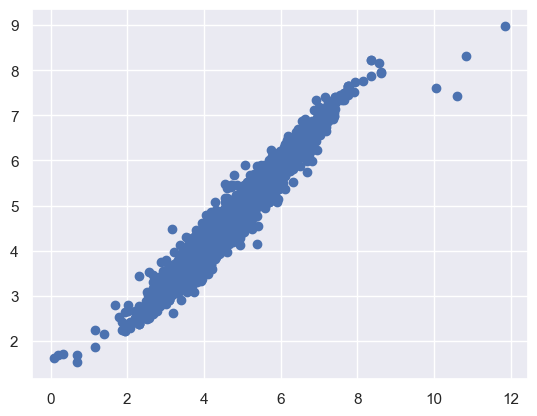

In [93]:
plt.scatter(y_train,y_pred_1)

In [94]:
y_pred = model.predict(x_test)

In [95]:
errors_1 = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors_1), 2), 'degrees.')

Mean Absolute Error: 0.1 degrees.


In [96]:
mape = 100 * (errors_1 / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.68 %.


C:\Users\patel\AppData\Local\Temp\ipykernel_6904\2332411778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='Log_Price', ylabel='Density'>

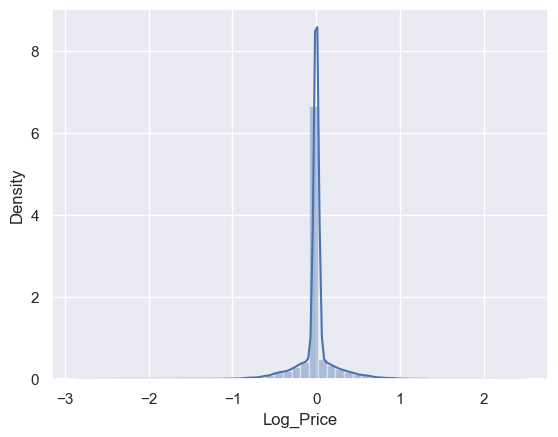

In [97]:
sns.distplot(y_test - y_pred)

In [98]:
data_16 = data_15.copy()


In [99]:
data_16 = data_16.astype(float)

In [100]:
data_16['Bathroom'].unique()

array([ 1.,  3.,  4.,  2.,  6.,  5.,  7.,  9.,  8., 10.])

C:\Users\patel\AppData\Local\Temp\ipykernel_6904\3041026858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_16['Bathroom'])


<Axes: xlabel='Bathroom', ylabel='Density'>

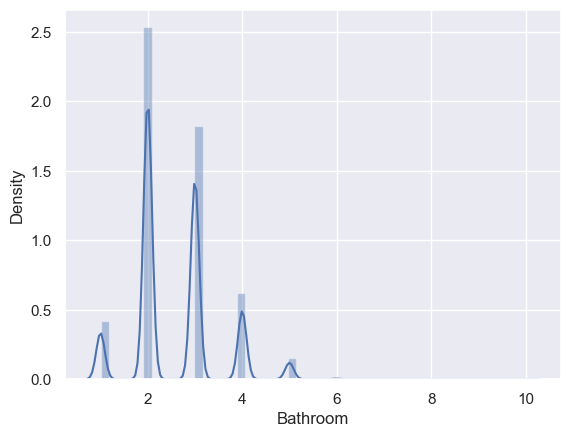

In [101]:
sns.distplot(data_16['Bathroom'])

In [102]:
print('Highest value of bath', round(data_16['Bathroom'].mean()+3*data_16['Bathroom'].std(),3))
print('Lowest value of bath', round(data_16['Bathroom'].mean()-3*data_16['Bathroom'].std(),3))

Highest value of bath 5.256
Lowest value of bath -0.13


In [103]:
data_cleaned_1 = data_16[(data_16['Bathroom']<5.253) & (data_16['Bathroom']>-0.122)]
data_cleaned_1

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished,Log_Price
0,500.0,0.909091,1.0,2.0,0.010308,0.0,1.0,0.0,1.0,3.737670
1,530.0,0.333333,1.0,1.0,0.010308,0.0,1.0,0.0,1.0,3.218876
2,900.0,0.111111,3.0,1.0,0.010308,0.0,1.0,0.0,1.0,5.075174
3,1820.0,0.666667,4.0,1.0,0.010308,0.0,1.0,1.0,0.0,6.052089
4,675.0,0.625000,2.0,1.0,0.010308,0.0,0.0,0.0,1.0,4.499810
...,...,...,...,...,...,...,...,...,...,...
93255,1200.0,1.000000,3.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.382027
93256,1705.0,0.500000,5.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.779123
93257,895.0,0.625000,3.0,2.0,0.008159,0.0,1.0,1.0,0.0,4.242765
93258,1050.0,0.333333,3.0,2.0,0.008159,0.0,0.0,0.0,1.0,3.804438


C:\Users\patel\AppData\Local\Temp\ipykernel_6904\2046522555.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_1['Bathroom'])


<Axes: xlabel='Bathroom', ylabel='Density'>

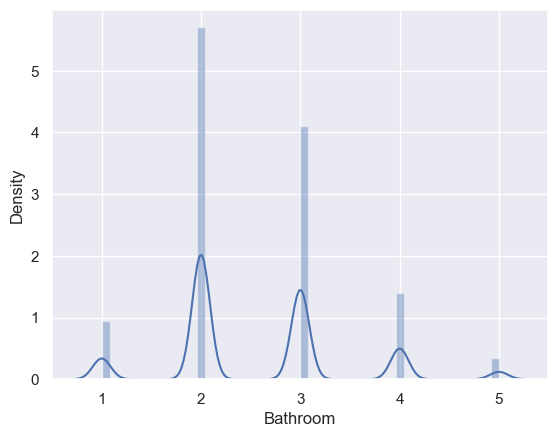

In [104]:
sns.distplot(data_cleaned_1['Bathroom'])

C:\Users\patel\AppData\Local\Temp\ipykernel_6904\1167393161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_1['Carpet Area'])


<Axes: xlabel='Carpet Area', ylabel='Density'>

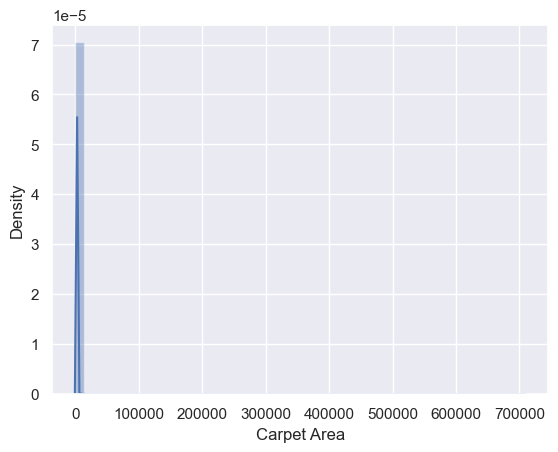

In [105]:
sns.distplot(data_cleaned_1['Carpet Area'])

In [106]:
print('Highest value of Carpet Area', round(data_cleaned_1['Carpet Area'].mean()+3*data_cleaned_1['Carpet Area'].std(),3))
print('Lowest value of Carpet Area', round(data_cleaned_1['Carpet Area'].mean()-3*data_cleaned_1['Carpet Area'].std(),3))

Highest value of Carpet Area 9826.057
Lowest value of Carpet Area -7202.22


In [107]:
data_cleaned_2 = data_cleaned_1[(data_cleaned_1['Carpet Area']<9764.219) & (data_cleaned_1['Carpet Area']>-7274.315)]
data_cleaned_2

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished,Log_Price
0,500.0,0.909091,1.0,2.0,0.010308,0.0,1.0,0.0,1.0,3.737670
1,530.0,0.333333,1.0,1.0,0.010308,0.0,1.0,0.0,1.0,3.218876
2,900.0,0.111111,3.0,1.0,0.010308,0.0,1.0,0.0,1.0,5.075174
3,1820.0,0.666667,4.0,1.0,0.010308,0.0,1.0,1.0,0.0,6.052089
4,675.0,0.625000,2.0,1.0,0.010308,0.0,0.0,0.0,1.0,4.499810
...,...,...,...,...,...,...,...,...,...,...
93255,1200.0,1.000000,3.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.382027
93256,1705.0,0.500000,5.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.779123
93257,895.0,0.625000,3.0,2.0,0.008159,0.0,1.0,1.0,0.0,4.242765
93258,1050.0,0.333333,3.0,2.0,0.008159,0.0,0.0,0.0,1.0,3.804438


C:\Users\patel\AppData\Local\Temp\ipykernel_6904\2132077066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_2['Carpet Area'])


<Axes: xlabel='Carpet Area', ylabel='Density'>

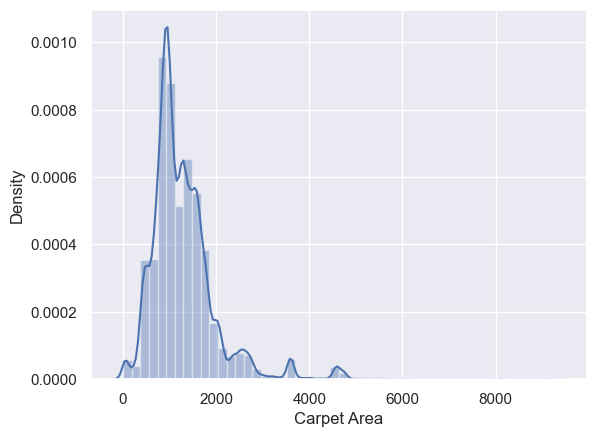

In [108]:
sns.distplot(data_cleaned_2['Carpet Area'])

In [109]:
data_cleaned_2

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished,Log_Price
0,500.0,0.909091,1.0,2.0,0.010308,0.0,1.0,0.0,1.0,3.737670
1,530.0,0.333333,1.0,1.0,0.010308,0.0,1.0,0.0,1.0,3.218876
2,900.0,0.111111,3.0,1.0,0.010308,0.0,1.0,0.0,1.0,5.075174
3,1820.0,0.666667,4.0,1.0,0.010308,0.0,1.0,1.0,0.0,6.052089
4,675.0,0.625000,2.0,1.0,0.010308,0.0,0.0,0.0,1.0,4.499810
...,...,...,...,...,...,...,...,...,...,...
93255,1200.0,1.000000,3.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.382027
93256,1705.0,0.500000,5.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.779123
93257,895.0,0.625000,3.0,2.0,0.008159,0.0,1.0,1.0,0.0,4.242765
93258,1050.0,0.333333,3.0,2.0,0.008159,0.0,0.0,0.0,1.0,3.804438


In [110]:
print('Highest value of Balcony', round(data_cleaned_2['Balcony'].mean()+3*data_cleaned_2['Balcony'].std(),3))
print('Lowest value of Balcony', round(data_cleaned_2['Balcony'].mean()-3*data_cleaned_2['Balcony'].std(),3))

Highest value of Balcony 4.969
Lowest value of Balcony -0.828


In [111]:
data_cleaned_3 = data_cleaned_2[(data_cleaned_2['Balcony']<4.977) & (data_cleaned_2['Balcony']>-0.828)]
data_cleaned_3

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished,Log_Price
0,500.0,0.909091,1.0,2.0,0.010308,0.0,1.0,0.0,1.0,3.737670
1,530.0,0.333333,1.0,1.0,0.010308,0.0,1.0,0.0,1.0,3.218876
2,900.0,0.111111,3.0,1.0,0.010308,0.0,1.0,0.0,1.0,5.075174
3,1820.0,0.666667,4.0,1.0,0.010308,0.0,1.0,1.0,0.0,6.052089
4,675.0,0.625000,2.0,1.0,0.010308,0.0,0.0,0.0,1.0,4.499810
...,...,...,...,...,...,...,...,...,...,...
93255,1200.0,1.000000,3.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.382027
93256,1705.0,0.500000,5.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.779123
93257,895.0,0.625000,3.0,2.0,0.008159,0.0,1.0,1.0,0.0,4.242765
93258,1050.0,0.333333,3.0,2.0,0.008159,0.0,0.0,0.0,1.0,3.804438


C:\Users\patel\AppData\Local\Temp\ipykernel_6904\2914167591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_3['Balcony'])


<Axes: xlabel='Balcony', ylabel='Density'>

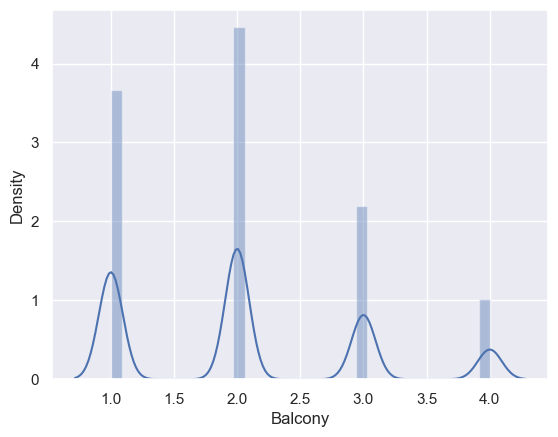

In [112]:
sns.distplot(data_cleaned_3['Balcony'])

C:\Users\patel\AppData\Local\Temp\ipykernel_6904\2642415574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_3['Log_Price'])


<Axes: xlabel='Log_Price', ylabel='Density'>

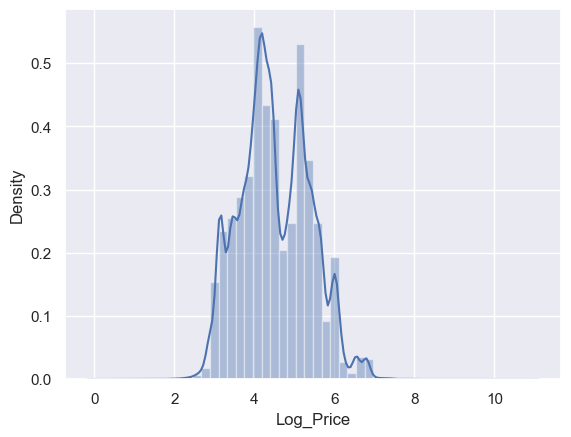

In [113]:
sns.distplot(data_cleaned_3['Log_Price'])

In [114]:
print('Highest value of Log_Price', round(data_cleaned_3['Log_Price'].mean()+3*data_cleaned_3['Log_Price'].std(),3))
print('Lowest value of Log_Price', round(data_cleaned_3['Log_Price'].mean()-3*data_cleaned_3['Log_Price'].std(),3))

Highest value of Log_Price 7.109
Lowest value of Log_Price 1.914


In [115]:
data_cleaned_4 = data_cleaned_3[(data_cleaned_3['Log_Price']<7.105) & (data_cleaned_3['Log_Price']>1.924)]
data_cleaned_4

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished,Log_Price
0,500.0,0.909091,1.0,2.0,0.010308,0.0,1.0,0.0,1.0,3.737670
1,530.0,0.333333,1.0,1.0,0.010308,0.0,1.0,0.0,1.0,3.218876
2,900.0,0.111111,3.0,1.0,0.010308,0.0,1.0,0.0,1.0,5.075174
3,1820.0,0.666667,4.0,1.0,0.010308,0.0,1.0,1.0,0.0,6.052089
4,675.0,0.625000,2.0,1.0,0.010308,0.0,0.0,0.0,1.0,4.499810
...,...,...,...,...,...,...,...,...,...,...
93255,1200.0,1.000000,3.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.382027
93256,1705.0,0.500000,5.0,3.0,0.008159,0.0,1.0,1.0,0.0,4.779123
93257,895.0,0.625000,3.0,2.0,0.008159,0.0,1.0,1.0,0.0,4.242765
93258,1050.0,0.333333,3.0,2.0,0.008159,0.0,0.0,0.0,1.0,3.804438


C:\Users\patel\AppData\Local\Temp\ipykernel_6904\1726082795.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned_4['Log_Price'])


<Axes: xlabel='Log_Price', ylabel='Density'>

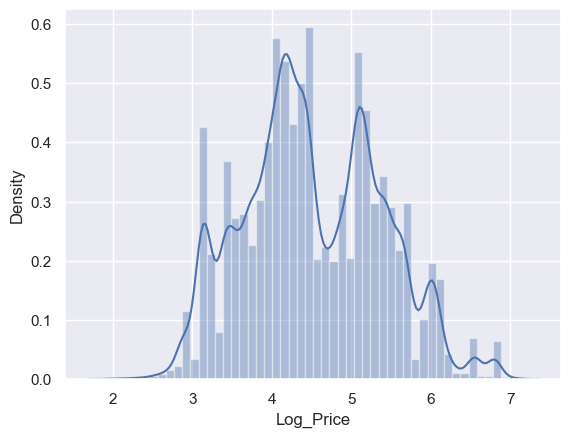

In [116]:
sns.distplot(data_cleaned_4['Log_Price'])

In [117]:
data_cleaned_4 = data_cleaned_4.reset_index(drop=True)

In [118]:
targets_1 = data_cleaned_4['Log_Price']
inputs_1 = data_cleaned_4.drop('Log_Price',axis=1)

In [119]:
inputs_1

,Carpet Area,Floor,Bathroom,Balcony,location_freq_encoded,Other,Resale,Semi-Furnished,Unfurnished
0,500.0,0.909091,1.0,2.0,0.010308,0.0,1.0,0.0,1.0
1,530.0,0.333333,1.0,1.0,0.010308,0.0,1.0,0.0,1.0
2,900.0,0.111111,3.0,1.0,0.010308,0.0,1.0,0.0,1.0
3,1820.0,0.666667,4.0,1.0,0.010308,0.0,1.0,1.0,0.0
4,675.0,0.625000,2.0,1.0,0.010308,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
92194,1200.0,1.000000,3.0,3.0,0.008159,0.0,1.0,1.0,0.0
92195,1705.0,0.500000,5.0,3.0,0.008159,0.0,1.0,1.0,0.0
92196,895.0,0.625000,3.0,2.0,0.008159,0.0,1.0,1.0,0.0
92197,1050.0,0.333333,3.0,2.0,0.008159,0.0,0.0,0.0,1.0


In [120]:
scaler.fit(inputs_1)

StandardScaler()

In [121]:
inputs_1_scaled = scaler.transform(inputs_1)

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(inputs_1_scaled,targets_1,test_size=0.2,random_state=1)

In [123]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [124]:
y_train.shape

(65123,)

In [125]:
import tensorflow as tf
input_size = 7
output_size = 1
hidden_layer_size = 100

new_model = tf.keras.Sequential([
    
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                             tf.keras.layers.Dense(output_size,activation=None), 
                           ])

In [126]:
new_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [127]:
NUM_EPOCHS = 10
early_stopping = tf.keras.callbacks.EarlyStopping()
new_model.fit(X_train,Y_train,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(X_val,Y_val),
          verbose=2)

Epoch 1/10
1729/1729 - 9s - loss: 1.1379 - accuracy: 0.0000e+00 - val_loss: 0.3204 - val_accuracy: 0.0000e+00 - 9s/epoch - 5ms/step
Epoch 2/10
1729/1729 - 6s - loss: 0.1751 - accuracy: 0.0000e+00 - val_loss: 0.2915 - val_accuracy: 0.0000e+00 - 6s/epoch - 3ms/step
Epoch 3/10
1729/1729 - 6s - loss: 0.1623 - accuracy: 0.0000e+00 - val_loss: 0.1396 - val_accuracy: 0.0000e+00 - 6s/epoch - 4ms/step
Epoch 4/10
1729/1729 - 5s - loss: 0.1120 - accuracy: 0.0000e+00 - val_loss: 0.2694 - val_accuracy: 0.0000e+00 - 5s/epoch - 3ms/step


In [128]:
predictions=new_model.predict(X_test)

577/577 [==============================] - 1s 2ms/step


In [129]:
Y_pred = predictions.reshape(-1)

In [130]:
Y_pred.shape

(18440,)

In [131]:
errors_2 = abs(Y_pred - Y_test)
print('Mean Absolute Error:', round(np.mean(errors_2), 2), 'degrees.')

Mean Absolute Error: 0.19 degrees.


In [132]:
mape = 100 * (errors_2 / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.48 %.


In [133]:
reg_1 = LinearRegression()
reg_1.fit(X_train,Y_train)

LinearRegression()

In [134]:
reg_1.score(X_train,Y_train)

0.7321106902429975

In [135]:
data_cleaned_4.columns

Index(['Carpet Area', 'Floor', 'Bathroom', 'Balcony', 'location_freq_encoded',
       'Other', 'Resale', 'Semi-Furnished', 'Unfurnished', 'Log_Price'],
      dtype='object')

In [136]:
reg_summary = pd.DataFrame([['Balcony'],['location_freq_encoded'],['Bathroom']],columns=['Features'])
reg_summary['weights'] = reg_1.intercept_,reg_1.coef_[0],reg_1.coef_[1]

In [137]:
reg_summary

,Features,weights
0,Balcony,4.511808
1,location_freq_encoded,0.340326
2,Bathroom,0.005287


In [138]:
a = sm.add_constant(data_cleaned_4[['Carpet Area', 'Floor', 'Bathroom', 'Balcony', 'location_freq_encoded',
       'Other', 'Resale', 'Semi-Furnished', 'Unfurnished', 'Log_Price']])


In [139]:
model = sm.OLS(targets_1, data_cleaned_4.drop('Log_Price',axis=1)).fit()

In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Log_Price   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          5.730e+05
Date:                Mon, 18 Sep 2023   Prob (F-statistic):                        0.00
Time:                        09:07:06   Log-Likelihood:                         -85032.
No. Observations:               92199   AIC:                                  1.701e+05
Df Residuals:                   92190   BIC:                                  1.702e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Carpet Area               0.0003   4.61e-06     60.085      0.000       0.000       0.000
Floor                     0.3935      0.007     55.488      0.000       0.380       0.407
Bathroom                  0.7612      0.003    228.108      0.000       0.755       0.768
Balcony                   0.2072      0.002     87.034      0.000       0.203       0.212
location_freq_encoded     5.9534      0.037    161.652      0.000       5.881       6.026
Other                     0.6296      0.430      1.463      0.143      -0.214       1.473
Resale                    0.3338      0.004     76.233      0.000       0.325       0.342
Semi-Furnished            0.7977      0.006    133.254      0.000       0.786       0.809
Unfurnished               0.9380      0.006    161.758      0.000       0.927       0.949
==============================================================================
Omnibus:                     3869.929   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6521.058
Skew:                           0.360   Prob(JB):                         0.00
Kurtosis:                       4.086   Cond. No.                     3.12e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
yhat = reg_1.predict(X_test)
yhat

array([4.03630434, 3.48778457, 4.81554329, ..., 4.03432994, 3.796655  ,
       3.74881364])

In [142]:
reg_1.score(X_test,Y_test)

0.7425595108046033

In [143]:
errors_1 = abs(yhat - Y_test)
print('Mean Absolute Error:', round(np.mean(errors_1), 2), 'degrees.')

Mean Absolute Error: 0.33 degrees.


In [144]:
mape = 100 * (errors_1 /Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.18 %.


In [145]:
yhat_1 = reg_1.predict(X_train)
yhat_1

array([4.87978221, 3.93913204, 4.05802476, ..., 4.23953941, 3.52817798,
       4.1213791 ])

C:\Users\patel\AppData\Local\Temp\ipykernel_6904\942338586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train-yhat_1)


<Axes: xlabel='Log_Price', ylabel='Density'>

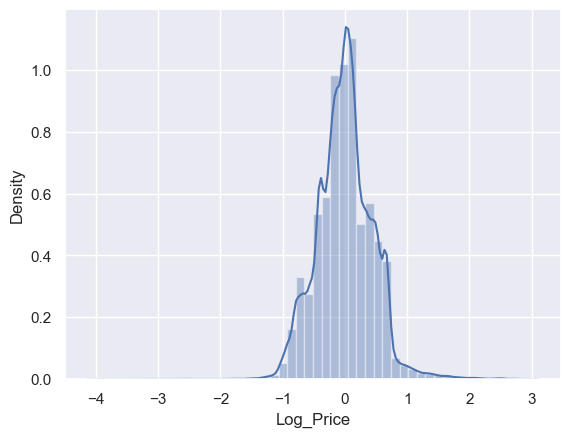

In [146]:
sns.distplot(Y_train-yhat_1)


In [147]:
errors_2 = abs(yhat_1 - Y_train)
print('Mean Absolute Error:', round(np.mean(errors_2), 2), 'degrees.')

Mean Absolute Error: 0.34 degrees.


In [148]:
mape_1 = 100 * (errors_2 /Y_train)
# Calculate and display accuracy
accuracy_1 = 100 - np.mean(mape_1)
print('Accuracy:', round(accuracy_1, 2), '%.')

Accuracy: 92.14 %.


In [149]:

# Train the model
model.fit(X_train, Y_train)

# Evaluate the model
score = model.score(X_test, Y_test)
print("R-squared (R2):", score)

AttributeError: 'OLSResults' object has no attribute 'fit'

In [ ]:
y_pred_1 = model.predict(X_train)
y_pred_1

In [ ]:
errors_3 = abs(y_pred_1 - Y_train)
print('Mean Absolute Error:', round(np.mean(errors_3), 2), 'degrees.')

In [ ]:
mape = 100 * (errors_3 / Y_train)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
y_pred_2 = model.predict(X_test)

In [ ]:
plt.scatter(Y_test,y_pred_2)

In [ ]:
importances = list(model.feature_importances_)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, list(inputs_1.columns), rotation='vertical')
# Axis labels and title
plt.ylabel('Price'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
X_train = pd.DataFrame(X_train, columns = inputs_1.columns)
